# Linear Regression 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


## Exercises: Applied

## Question 8.

This question involves the use of simple linear regression on the Auto data set.

### 8 (a) i).
Use the lm() function to perform a simple linear regression with
mpg as the response and horsepower as the predictor. Use the
summary() function to print the results. Comment on the output.
For example:

i. Is there a relationship between the predictor and the response?

In [2]:
df_auto = pd.read_csv('datasets/Auto.data', delim_whitespace=True)
df_auto.replace('?',0, inplace=True)
df_auto.head(2)

mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0      130.0  3504.0          12.0    70   
1  15.0          8         350.0      165.0  3693.0          11.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320

In [3]:
df_auto['horsepower'] = pd.to_numeric(df_auto.horsepower)
X = df_auto['horsepower']
X = sm.add_constant(X)
y = df_auto['mpg']

result = sm.OLS(y, X).fit()
result.summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     543.5
Date:                Sun, 05 Jul 2020   Prob (F-statistic):           3.10e-76
Time:                        16:36:41   Log-Likelihood:                -1207.8
No. Observations:                 397   AIC:                             2420.
Df Residuals:                     395   BIC:                             2428.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.8792      0.707     55.019      0.000      37.490      40.268
horsepower    -0.1489      0.006    -23.314      0.000      -0.161      -0.136
==============================================================================
Omnibus:                       12.157   Durbin-Watson:                   0.995
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.244
Skew:                           0.323   Prob(JB):                     0.000807
Kurtosis:                       3.667   Cond. No.                         306.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Yes, there is a strong relationship between the predictor and response. (Statistical significance).

### 8 (a) ii).
How strong is the relationship between the predictor and
the response?

* T-stat -23 and p-value less than 0.05.

### 8 (a) iii).
Is the relationship between the predictor and the response
positive or negative?

* The relationship between predictor and response variables is negative.

### 8 (a) iv).
What is the predicted mpg associated with a horsepower of
98? What are the associated 95 % confidence and prediction
intervals?

* H.P within -0.161 & -0.136.

### 8 (b).

(b) Plot the response and the predictor. Use the abline() function
to display the least squares regression line.

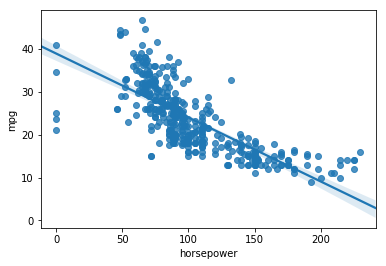

In [4]:
sns.regplot(x='horsepower', y='mpg', data=df_auto)

### 8 (c).
(c) Use the plot() function to produce diagnostic plots of the least
squares regression fit. Comment on any problems you see with
the fit.

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

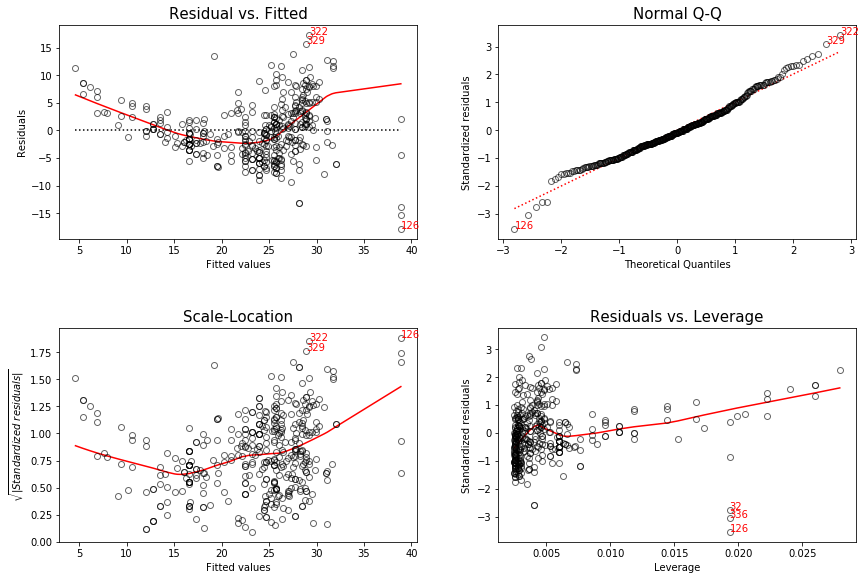

In [5]:
import lmdiag
plt.figure(figsize=(12,8))
lmdiag.plot(result)

* From the first diag plot (residual vs fitted), we observe that there is no linearity of errors. We observe extreme residuals at both ends of fitted values.


* From the second plot, we observe that residuals follow normal distributions. However, we see 126, 322 & 329 as outliers.


* From the third plot, we observe that there are outliers and is not perfectly homoskedastic.


* From the fourth plot, we observe the outliers 32, 126 and 336 have high error as well as high leverage.

## Question 9.

### 9 (a).
Produce a scatterplot matrix which includes all of the variables
in the data set.

In [6]:
df_auto.head(2)

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0  3504.0          12.0    70   
1  15.0          8         350.0       165.0  3693.0          11.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320

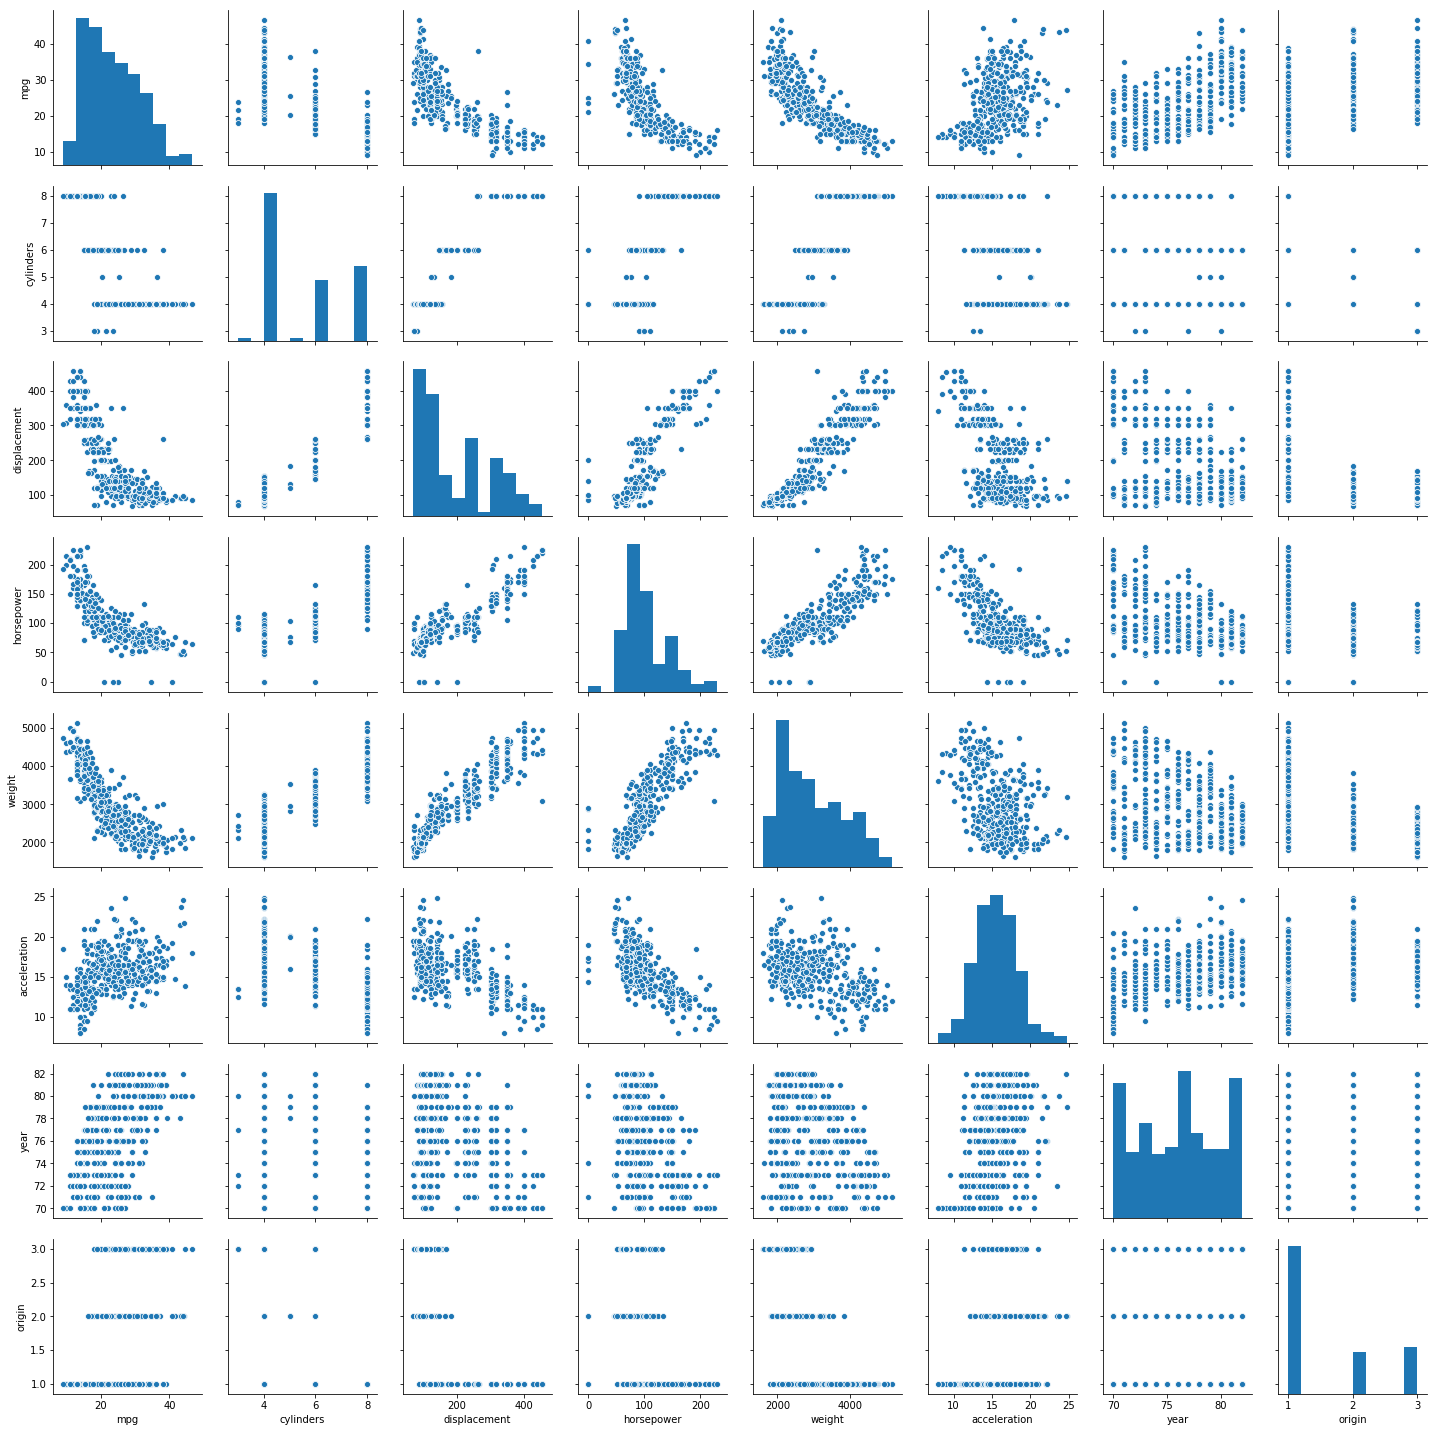

In [7]:
sns.pairplot(df_auto)

### 9 (b).
Compute the matrix of correlations between the variables using
the function cor(). You will need to exclude the name variable, cor() which is qualitative.

In [8]:
df_auto[df_auto.columns[:-3]].corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.776260     -0.804443   -0.761004 -0.831739   
cylinders    -0.776260   1.000000      0.950920    0.823711  0.897017   
displacement -0.804443   0.950920      1.000000    0.876741  0.933104   
horsepower   -0.761004   0.823711      0.876741    1.000000  0.845483   
weight       -0.831739   0.897017      0.933104    0.845483  1.000000   
acceleration  0.422297  -0.504061     -0.544162   -0.670643 -0.419502   

              acceleration  
mpg               0.422297  
cylinders        -0.504061  
displacement     -0.544162  
horsepower       -0.670643  
weight           -0.419502  
acceleration      1.000000

### 9 (c).
Use the lm() function to perform a multiple linear regression
with mpg as the response and all other variables except name as
the predictors. Use the summary() function to print the results.
Comment on the output. For instance:

In [9]:
X = sm.add_constant(df_auto[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin',]])

y = df_auto['mpg']

result = sm.OLS(y, X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.0
Date:                Sun, 05 Jul 2020   Prob (F-statistic):          1.28e-141
Time:                        16:36:54   Log-Likelihood:                -1036.8
No. Observations:                 397   AIC:                             2090.
Df Residuals:                     389   BIC:                             2121.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.9640      4.449     -4.038      0.000     -26.712      -9.216
cylinders       -0.4636      0.322     -1.441      0.150      -1.096       0.169
displacement     0.0200      0.007      2.688      0.007       0.005       0.035
horsepower      -0.0149      0.011     -1.335      0.183      -0.037       0.007
weight          -0.0066      0.001    -10.544      0.000      -0.008      -0.005
acceleration     0.0939      0.091      1.027      0.305      -0.086       0.274
year             0.7574      0.050     15.083      0.000       0.659       0.856
origin           1.4457      0.277      5.218      0.000       0.901       1.990
==============================================================================
Omnibus:                       30.358   Durbin-Watson:                   1.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.913
Skew:                           0.513   Prob(JB):                     2.39e-11
Kurtosis:                       4.379   Cond. No.                     8.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 9 (c) i).
i. Is there a relationship between the predictors and the response?

Yes, there is a relationship between predictors and response. p-value for F-stat is < 0.05 & most variables have t-stat above significance levels.

### 9 (c) ii).
ii. Which predictors appear to have a statistically significant
relationship to the response?

displacement, weight, year & origin have p < 0.05.

### 9 (c) iii).
iii. What does the coefficient for the year variable suggest?

For every 1 unit increase in year, mpg increaes by 0.75.

### 9 (d).

(d) Use the plot() function to produce diagnostic plots of the linear
regression fit. Comment on any problems you see with the fit.
Do the residual plots suggest any unusually large outliers? Does
the leverage plot identify any observations with unusually high
leverage?

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

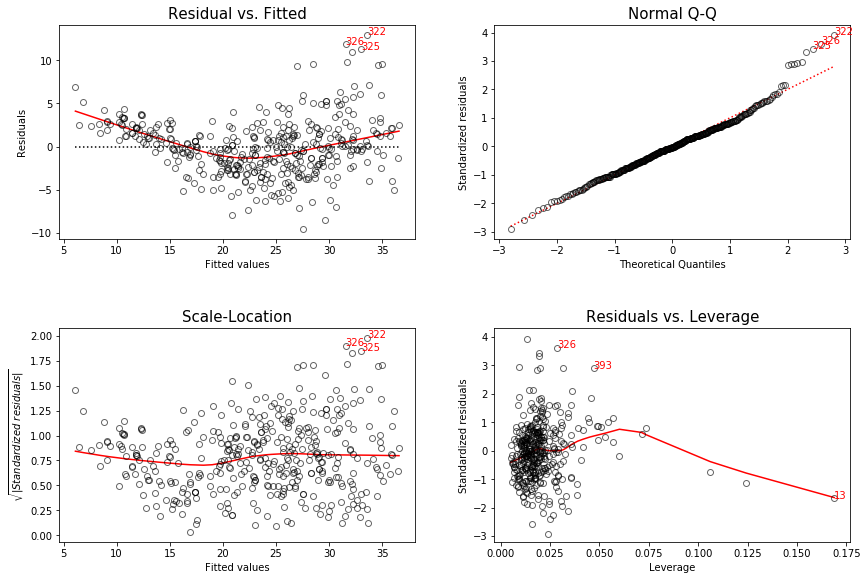

In [10]:
import lmdiag
plt.figure(figsize=(12,8))
lmdiag.plot(result)

* Looking at diagnostic plots, we can confirm that there are few outliers (322, 326, 325).

* pt 13 has high leverage & other outliers do not follow normality of errors.

### 9 (e).
(e) Use the * and : symbols to fit linear regression models with
interaction effects. Do any interactions appear to be statistically
significant?

In [11]:
X = df_auto[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']]

In [12]:
from sklearn.preprocessing import PolynomialFeatures
p = PolynomialFeatures()
X = p.fit_transform(X)

In [13]:
X = sm.add_constant(X)

y = df_auto['mpg']

result = sm.OLS(y, X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     89.27
Date:                Sun, 05 Jul 2020   Prob (F-statistic):          1.30e-155
Time:                        16:36:56   Log-Likelihood:                -929.53
No. Observations:                 397   AIC:                             1931.
Df Residuals:                     361   BIC:                             2074.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        342.2594     93.472      3.662      0.000     158.442     526.077
x1            10.9555      8.352      1.312      0.190      -5.470      27.381
x2            -0.6077      0.192     -3.168      0.002      -0.985      -0.230
x3             0.4717      0.308      1.532      0.126      -0.134       1.077
x4             0.0091      0.017      0.522      0.602      -0.025       0.044
x5            -5.9961      2.363     -2.538      0.012     -10.643      -1.349
x6            -7.5218      2.127     -3.537      0.000     -11.704      -3.339
x7           -19.3962      6.985     -2.777      0.006     -33.132      -5.660
x8            -0.6023      0.443     -1.359      0.175      -1.474       0.269
x9             0.0140      0.018      0.771      0.441      -0.022       0.050
x10           -0.0166      0.021     -0.783      0.434      -0.058       0.025
x11            0.0012      0.001      1.125      0.261      -0.001       0.003
x12            0.1292      0.163      0.793      0.428      -0.191       0.449
x13           -0.1479      0.096     -1.540      0.124      -0.337       0.041
x14            0.5627      0.549      1.025      0.306      -0.517       1.643
x15           -0.0001      0.000     -0.487      0.626      -0.001       0.000
x16            0.0005      0.000      1.314      0.190      -0.000       0.001
x17         6.883e-09   2.08e-05      0.000      1.000   -4.08e-05    4.09e-05
x18            0.0016      0.004      0.412      0.680      -0.006       0.009
x19            0.0060      0.002      2.522      0.012       0.001       0.011
x20            0.0204      0.021      0.962      0.337      -0.021       0.062
x21           -0.0006      0.000     -2.218      0.027      -0.001   -6.51e-05
x22         6.046e-06   3.17e-05      0.191      0.849   -5.62e-05    6.83e-05
x23           -0.0096      0.006     -1.704      0.089      -0.021       0.001
x24           -0.0037      0.003     -1.067      0.287      -0.010       0.003
x25           -0.0069      0.026     -0.268      0.789      -0.058       0.044
x26         8.944e-08   1.07e-06      0.083      0.934   -2.02e-06     2.2e-06
x27            0.0002      0.000      0.581      0.562      -0.000       0.001
x28           -0.0003      0.000     -1.520      0.129      -0.001     9.2e-05
x29           -0.0004      0.002     -0.237      0.813      -0.003       0.003
x30            0.0234      0.031      0.749      0.455      -0.038       0.085
x31            0.0510      0.024      2.089      0.037       0.003       0.099
x32            0.4862      0.147      3.304      0.001       0.197       0.776
x33            0.0539      0.013      4.091      0.000       0.028       0.080
x34            0.1227      0.071      1.730      0.084      -0.017       0.262
x35           -0.1598      0.488     -0.328      0.743      -1.119       0.799
==

### 9 (f).
Try a few different transformations of the variables, such as
log(X), √
X, X2. Comment on your findings.

In [14]:
X = df_auto[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']]

In [15]:
X_log = np.log(X)
X_sqrt = np.sqrt(X)
X_square = X**2

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


### Square model

In [16]:
X = sm.add_constant(X_square)
y = df_auto['mpg']
result = sm.OLS(y, X).fit()
result.summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     219.5
Date:                Sun, 05 Jul 2020   Prob (F-statistic):          7.40e-131
Time:                        16:36:56   Log-Likelihood:                -1062.1
No. Observations:                 397   AIC:                             2140.
Df Residuals:                     389   BIC:                             2172.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.0353      2.343      0.442      0.659      -3.571       5.641
cylinders       -0.0872      0.025     -3.465      0.001      -0.137      -0.038
displacement  5.801e-05   1.38e-05      4.206      0.000    3.09e-05    8.51e-05
horsepower   -3.765e-05   4.89e-05     -0.770      0.442      -0.000    5.85e-05
weight       -9.493e-07   8.95e-08    -10.602      0.000   -1.13e-06   -7.73e-07
acceleration     0.0064      0.003      2.406      0.017       0.001       0.012
year             0.0050      0.000     14.342      0.000       0.004       0.006
origin           0.4141      0.069      5.986      0.000       0.278       0.550
==============================================================================
Omnibus:                       20.281   Durbin-Watson:                   1.297
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.160
Skew:                           0.424   Prob(JB):                     1.27e-06
Kurtosis:                       3.961   Cond. No.                     1.45e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

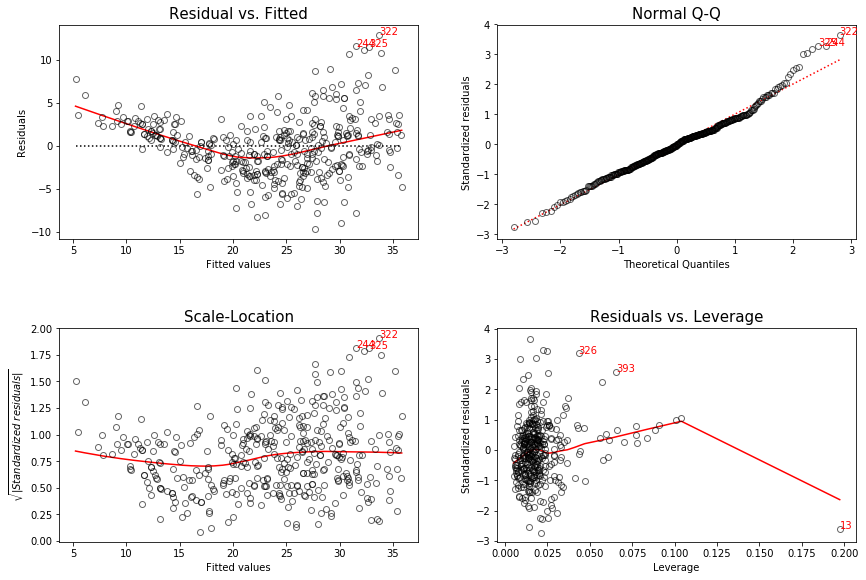

In [17]:
import lmdiag
plt.figure(figsize=(12,8))
lmdiag.plot(result)

### Sqrt Model

In [18]:
X = sm.add_constant(X_sqrt)
y = df_auto['mpg']
result = sm.OLS(y, X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     277.9
Date:                Sun, 05 Jul 2020   Prob (F-statistic):          4.41e-147
Time:                        16:36:59   Log-Likelihood:                -1023.9
No. Observations:                 397   AIC:                             2064.
Df Residuals:                     389   BIC:                             2096.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -58.4065      8.237     -7.091      0.000     -74.601     -42.212
cylinders       -0.0186      1.539     -0.012      0.990      -3.043       3.006
displacement     0.1962      0.229      0.855      0.393      -0.255       0.647
horsepower      -0.2578      0.146     -1.768      0.078      -0.544       0.029
weight          -0.7041      0.069    -10.246      0.000      -0.839      -0.569
acceleration     0.1929      0.652      0.296      0.768      -1.089       1.475
year            13.2275      0.835     15.833      0.000      11.585      14.870
origin           3.1598      0.763      4.142      0.000       1.660       4.659
==============================================================================
Omnibus:                       39.000   Durbin-Watson:                   1.302
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.284
Skew:                           0.585   Prob(JB):                     2.01e-16
Kurtosis:                       4.733   Cond. No.                     2.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

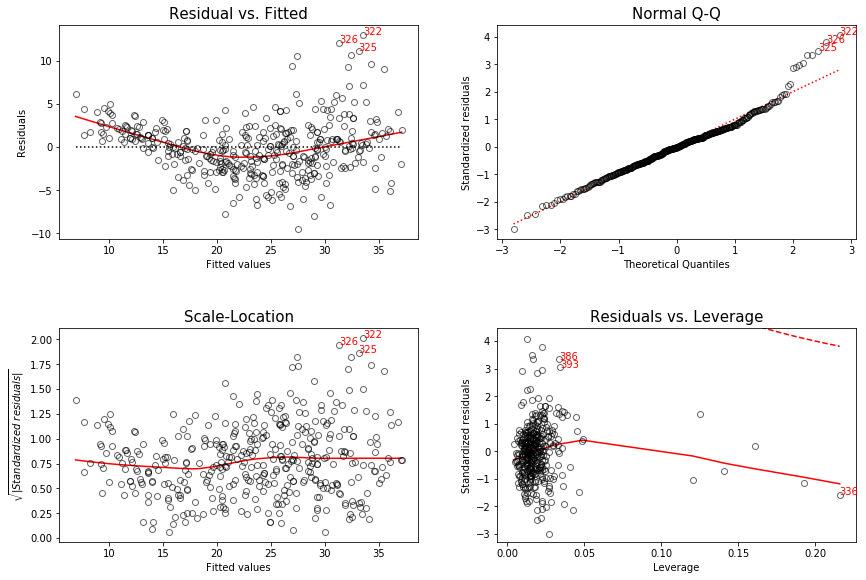

In [19]:
import lmdiag
plt.figure(figsize=(12,8))
lmdiag.plot(result)

* We observe that square and square root models work slightly better than linear OLS model.

### 10).
This question should be answered using the Carseats data set.

(a) Fit a multiple regression model to predict Sales using Price,
Urban, and US.

In [20]:
# source: https://github.com/selva86/datasets/blob/master/Carseats.csv
df_seats = pd.read_csv('datasets/Carseats.csv')
df_seats.head(2)

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes

In [21]:
df_seats['Urban'] = df_seats['Urban'].apply(lambda x: 1 if x == "Yes" else 0)
df_seats['US'] = df_seats['US'].apply(lambda x: 1 if x == "Yes" else 0)

In [22]:
X = sm.add_constant(df_seats[['Price', 'Urban', 'US']])
y = np.asarray(df_seats['Sales'])
result1 = sm.OLS(y, X).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 05 Jul 2020   Prob (F-statistic):           2.39e-23
Time:                        16:37:01   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban         -0.0219      0.272     -0.081      0.936      -0.556       0.512
US             1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 10 (b).
(b) Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative

* Once unit increase in Price, reduces Sale price by -0.05. If Urban, sale price reduces by -0.02, and if US, sale price increases by 1.2.

### 10 (c).

(c) Write out the model in equation form, being careful to handle
the qualitative variables properly.

* Sales = b0 + b1(Price) + b2(Categ(Urban?)) + b3(Categ(US?))

### 10 (d).

(d) For which of the predictors can you reject the null hypothesis
H0 : βj = 0?

* We can reject null hypothesis for Price & US.

### 10 (e).
(e) On the basis of your response to the previous question, fit a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.

In [23]:
X = sm.add_constant(df_seats[['Price', 'US']])
y = np.asarray(df_seats['Sales'])
result2 = sm.OLS(y, X).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 05 Jul 2020   Prob (F-statistic):           2.66e-24
Time:                        16:37:01   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US             1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 10 (f).
How well do the models in (a) and (e) fit the data?

In [24]:
result1.summary().tables[0]

<class 'statsmodels.iolib.table.SimpleTable'>

In [25]:
result2.summary().tables[0]

<class 'statsmodels.iolib.table.SimpleTable'>

* The two models are comparable with similar R2 and Log-Likelihoods.

### 10 (g).
(g) Using the model from (e), obtain 95 % confidence intervals for
the coefficient(s).

In [26]:
result2.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

### 10 (h).
(h) Is there evidence of outliers or high leverage observations in the
model from (e)?

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

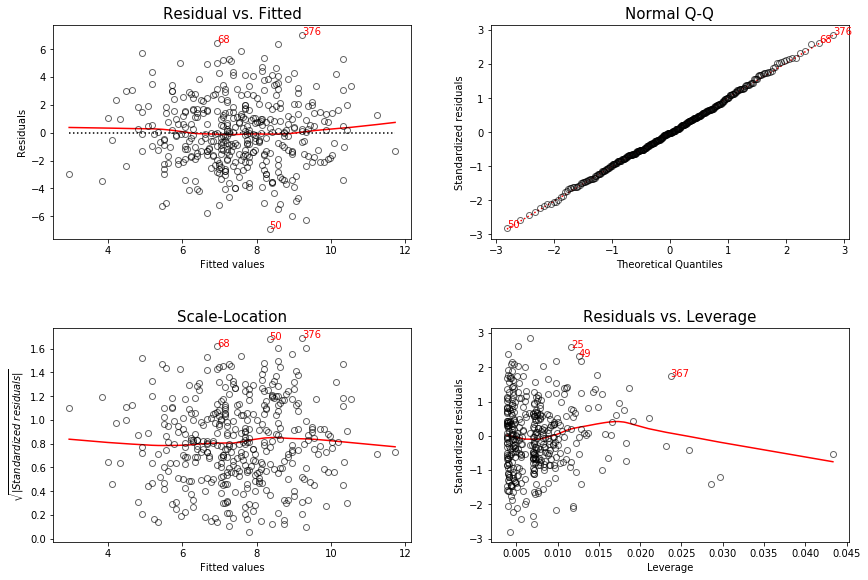

In [27]:
plt.figure(figsize=(12,8))
lmdiag.plot(result2)

* Yes, there are few outliers and high leverage points. Overall, the model does follow linear regression assumptions.

## Question 11).
In this problem we will investigate the t-statistic for the null hypothesis H0 : β = 0 in simple linear regression without an intercept. To
begin, we generate a predictor x and a response y as follows.

In [28]:
X = np.random.rand(100)
y = 2*X + np.random.normal(100)

### 11 (a).

(a) Perform a simple linear regression of y onto x, without an intercept. Report the coefficient estimate βˆ, the standard error of
this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0 : β = 0. Comment on these
results. (You can perform regression without an intercept using
the command lm(y∼x+0).)

In [29]:
X = sm.add_constant(X)
result = sm.OLS(y, X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.502e+28
Date:                Sun, 05 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:37:05   Log-Likelihood:                 2926.6
No. Observations:                 100   AIC:                            -5849.
Df Residuals:                      98   BIC:                            -5844.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.7601    9.7e-15   1.03e+16      0.000      99.760      99.760
x1             2.0000   1.63e-14   1.23e+14      0.000       2.000       2.000
==============================================================================
Omnibus:                       38.422   Durbin-Watson:                   0.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.725
Skew:                          -0.926   Prob(JB):                     5.21e-05
Kurtosis:                       1.857   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* x1 is statistically significant predictor of y.

### 11 (b).
Now perform a simple linear regression of x onto y without an
intercept, and report the coefficient estimate, its standard error,
and the corresponding t-statistic and p-values associated with
the null hypothesis H0 : β = 0. Comment on these results.

### 11 (c).
What is the relationship between the results obtained in (a) and
(b)?

### 11 (d).
For the regression of Y onto X without an intercept, the tstatistic for H0 : β = 0 takes the form β/ˆ SE(βˆ), where βˆ is
given by (3.38)

### 11 (e).
Using the results from (d), argue that the t-statistic for the regression of y onto x is the same as the t-statistic for the regression
of x onto y.

In [30]:
X = np.random.rand(100)
y = 2*X + np.random.normal(100)

X = sm.add_constant(X)
result = sm.OLS(y, X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.164e+28
Date:                Sun, 05 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:37:05   Log-Likelihood:                 3023.1
No. Observations:                 100   AIC:                            -6042.
Df Residuals:                      98   BIC:                            -6037.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.3686   3.78e-15   2.63e+16      0.000      99.369      99.369
x1             2.0000   6.61e-15   3.03e+14      0.000       2.000       2.000
==============================================================================
Omnibus:                        9.316   Durbin-Watson:                   0.613
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                3.501
Skew:                           0.079   Prob(JB):                        0.174
Kurtosis:                       2.097   Cond. No.                         4.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Comparing both models, we see that model2 has perfect R-squared.

* Yes, t-stat for regressing x on y and y on x is the same as they can be interchanged on single predictor model without intercept.

## Problem 15).
This problem involves the Boston data set, which we saw in the lab
for this chapter. We will now try to predict per capita crime rate
using the other variables in this data set. In other words, per capita
crime rate is the response, and the other variables are the predictors.

In [32]:
from sklearn.datasets import load_boston
bos = load_boston()
X, y = load_boston(return_X_y=True)
df_bos = pd.DataFrame(X, columns=bos.feature_names)
df_bos['y'] = y

### 15 (a).
For each predictor, fit a simple linear regression model to predict
the response. Describe your results. In which of the models is
there a statistically significant association between the predictor
and the response? Create some plots to back up your assertions.

In [33]:
results = []
for col in df_bos.columns[:-1]:
    X = sm.add_constant(df_bos[col])
    result = sm.OLS(y, X).fit()
    results.append(result)

In [34]:
results[0].summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [35]:
results[1].summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [36]:
results[2].summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [37]:
results[3].summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [38]:
results[4].summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [39]:
results[5].summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [40]:
results[6].summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [41]:
results[7].summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [42]:
results[8].summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [43]:
results[9].summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [44]:
results[10].summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [45]:
results[11].summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [46]:
results[12].summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

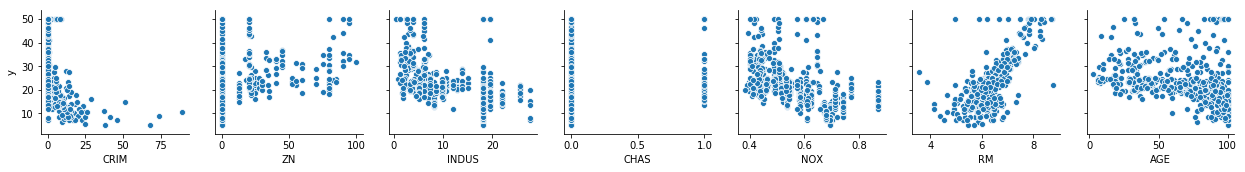

In [47]:
sns.pairplot(df_bos, y_vars='y', x_vars=df_bos.columns[:7])

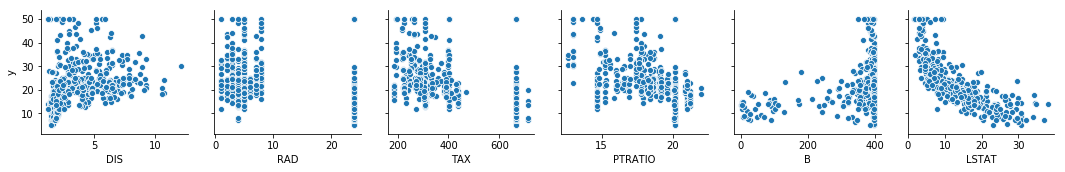

In [48]:
sns.pairplot(df_bos, y_vars='y', x_vars=df_bos.columns[7:-1])

### 15 (b).
 Fit a multiple regression model to predict the response using
all of the predictors. Describe your results. For which predictors
can we reject the null hypothesis H0 : βj = 0?

In [49]:
X = sm.add_constant(df_bos[df_bos.columns[:-1]])
result = sm.OLS(df_bos['y'], X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 05 Jul 2020   Prob (F-statistic):          6.72e-135
Time:                        16:37:30   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* For CRIM, ZN, CHAS, NOX, RM, DIS, RAD, TAX, PRATIO, B & LSTAT we can reject the null. Good R-squared, adj-R-squared and F-stat.

### 15 (c).
How do your results from (a) compare to your results from (b)?
Create a plot displaying the univariate regression coefficients
from (a) on the x-axis, and the multiple regression coefficients
from (b) on the y-axis. That is, each predictor is displayed as a
single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate
in the multiple linear regression model is shown on the y-axis.

In [50]:
# fetching betas from single model
betas_single = [results[i].params.values[1] for i in range(len(df_bos.columns[:-1]))]

In [51]:
# fetching betas from multiple regression
betas_multiple = result.params[1:].values

In [52]:
len(betas_single), len(betas_multiple)

(13, 13)

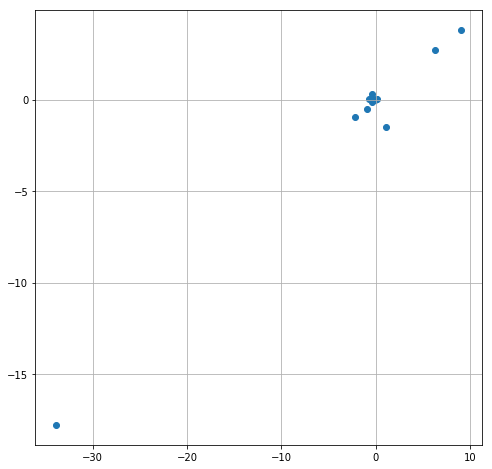

In [53]:
plt.figure(figsize=(8,8))
plt.grid()
plt.scatter(betas_single, betas_multiple)

### 15 (d).
Is there evidence of non-linear association between any of the
predictors and the response? To answer this question, for each
predictor X, fit a model of the form
Y = β0 + β1X + β2X2 + β3X3 + .

In [54]:
results_poly = []
for col in df_bos.columns[:-1]:
    X = df_bos[[col]]
    X_square = pd.DataFrame(X**2)
    X_cubic = pd.DataFrame(X**3)
    X = pd.concat([X, X_square, X_cubic], axis=1)
    X.columns = [str(col), str(col)+'_sq', str(col)+'_cubic']
    X = sm.add_constant(X)
    result = sm.OLS(y, X).fit()
    results_poly.append(result)

In [55]:
# poly R squared
rsquared_poly = [results_poly[i].rsquared for i in range(len(df_bos.columns[:-1]))]

# linear R squared
rsquared_linear = [results[i].rsquared for i in range(len(df_bos.columns[:-1]))]

In [56]:
df_r_squared = pd.DataFrame()
df_r_squared['R_squared_single_model'] = rsquared_linear
df_r_squared['R_squared_poly_model'] = rsquared_poly
df_r_squared['percent_improvement'] = (df_r_squared['R_squared_poly_model'] - 
                                       df_r_squared['R_squared_single_model'])*(100)/df_r_squared['R_squared_single_model']

In [57]:
df_r_squared

R_squared_single_model  R_squared_poly_model  percent_improvement
0                 0.150780              0.217705            44.385336
1                 0.129921              0.164925            26.942371
2                 0.233990              0.276834            18.310317
3                 0.030716              0.030716             0.000000
4                 0.182603              0.193866             6.168039
5                 0.483525              0.561226            16.069530
6                 0.142095              0.156573            10.189172
7                 0.062464              0.105024            68.134681
8                 0.145639              0.176688            21.319310
9                 0.219526              0.226104             2.996684
10                0.257847              0.266851             3.491724
11                0.111196              0.113539             2.107388
12                0.544146              0.657848            20.895363

* We see steady improvement in R-squared across all models from linear to poly.